#**INTRODUCTION**

Customer retention is a critical concern for businesses in today’s competitive landscape. Predicting customer churn and identifying distinct customer segments can help companies develop targeted marketing strategies and improve customer experience.

# Leveraging machine learning models to analyze customer data allows businesses to make data-driven decisions, maximizing both retention and personalized marketing efforts.

This project focuses on building predictive models to identify potential customer churn and employing clustering techniques to group customers based on behavior and preferences, utilizing Python/R for data analysis.

#**OBJECTIVES**

1.] Predicting Customer Churn: To develop a supervised learning model that predicts which customers are likely to churn based on historical data, allowing companies to intervene proactively.


2.] Clustering Customer Segments: To identify distinct customer segments through unsupervised learning, enabling businesses to tailor marketing strategies for different groups and enhance customer satisfaction.

These models will help businesses in creating effective marketing campaigns, reducing churn rates, and boosting customer loyalty by understanding customer behavior more deeply.



#**METHODOLOGY**

1.] **Data Collection and Preprocessing**:

Gather customer data, including demographics, usage patterns, and interactions (e.g., monthly charges, contract type, payment method).

Clean and preprocess the data by handling missing values, encoding categorical variables, and normalizing numerical features.


2.] **Exploratory Data Analysis (EDA)**:

Perform visualizations (heatmaps, box plots, count plots) to identify patterns in the data and understand the relationships between variables like Gender, Contract, MonthlyCharges, and Churn.

3.] **Predicting Customer Churn (Supervised Learning)**:

Algorithm: Apply Logistic Regression, Decision Trees, and Random Forests to build a churn prediction model.
Feature Selection: Use important features such as MonthlyCharges, Tenure, and Contract Type to predict churn.
Model Evaluation: Use accuracy, precision, recall, and confusion matrices to evaluate the model's performance.

4.] **Customer Segmentation (Unsupervised Learning)**:

Algorithm: Implement K-means clustering and hierarchical clustering to group customers based on attributes like Income, Tenure, and MonthlyCharges.
Model Evaluation: Determine the optimal number of clusters using the Elbow method and interpret cluster characteristics.

5.] **Visualization and Reporting**:

Visualize churn probability with ROC curves and cluster segmentation using scatter plots and dendrograms.
Present findings and insights using charts and graphs to communicate effectively with stakeholders.

In [ ]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Simulate demographic and behavioral data
num_customers = 1000
CustomerID = np.arange(1, num_customers+1)
Age = np.random.randint(18, 70, num_customers)
Gender = np.random.choice(['Male', 'Female'], num_customers)
Income = np.random.randint(30000, 120000, num_customers)
Tenure = np.random.randint(1, 60, num_customers)
MonthlyCharges = np.round(np.random.uniform(30, 150, num_customers), 2)
TotalCharges = np.round(MonthlyCharges * Tenure, 2)
Contract = np.random.choice(['Month-to-month', 'One year', 'Two year'], num_customers)
PaymentMethod = np.random.choice(['Credit card', 'Electronic check', 'Mailed check'], num_customers)
Churn = np.random.choice([0, 1], num_customers, p=[0.8, 0.2])

# Create DataFrame
churn_data = pd.DataFrame({
    'CustomerID': CustomerID,
    'Age': Age,
    'Gender': Gender,
    'Income': Income,
    'Tenure': Tenure,
    'MonthlyCharges': MonthlyCharges,
    'TotalCharges': TotalCharges,
    'Contract': Contract,
    'PaymentMethod': PaymentMethod,
    'Churn': Churn
})

# Preview dataset
print(churn_data.head())


   CustomerID  Age  Gender  Income  Tenure  MonthlyCharges  TotalCharges  \
0           1   56    Male   75648      42           64.61       2713.62   
1           2   69    Male   39516      58          145.34       8429.72   
2           3   46    Male   32396      16           76.74       1227.84   
3           4   32  Female  114082       8           76.26        610.08   
4           5   60    Male   49129       1           70.85         70.85   

         Contract     PaymentMethod  Churn  
0        Two year  Electronic check      0  
1        One year  Electronic check      1  
2        One year  Electronic check      0  
3  Month-to-month  Electronic check      0  
4        Two year       Credit card      1  


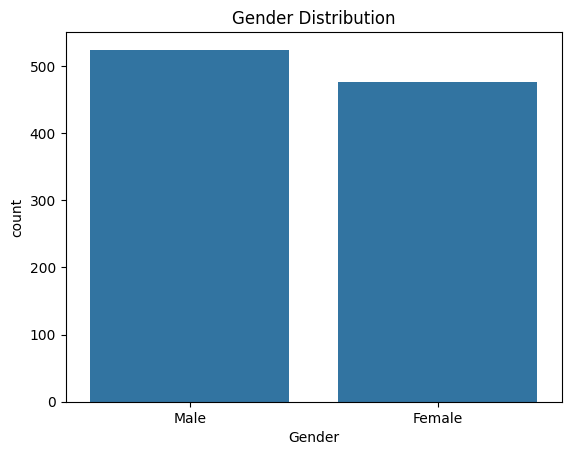

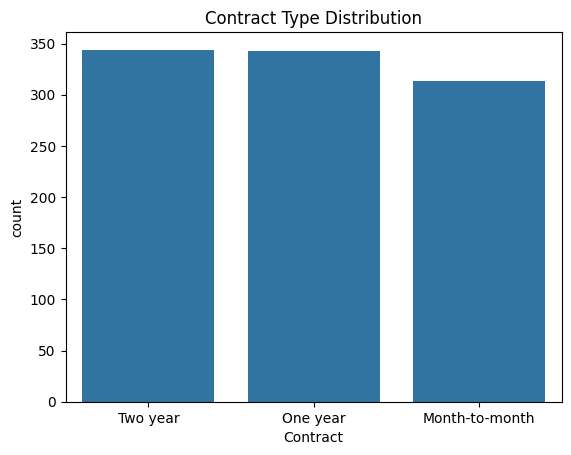

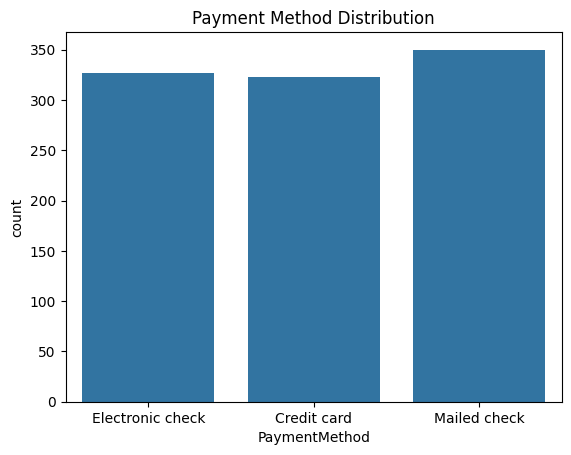

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Gender
sns.countplot(x='Gender', data=churn_data)
plt.title('Gender Distribution')
plt.show()

# Count plot for Contract
sns.countplot(x='Contract', data=churn_data)
plt.title('Contract Type Distribution')
plt.show()

# Count plot for Payment Method
sns.countplot(x='PaymentMethod', data=churn_data)
plt.title('Payment Method Distribution')
plt.show()


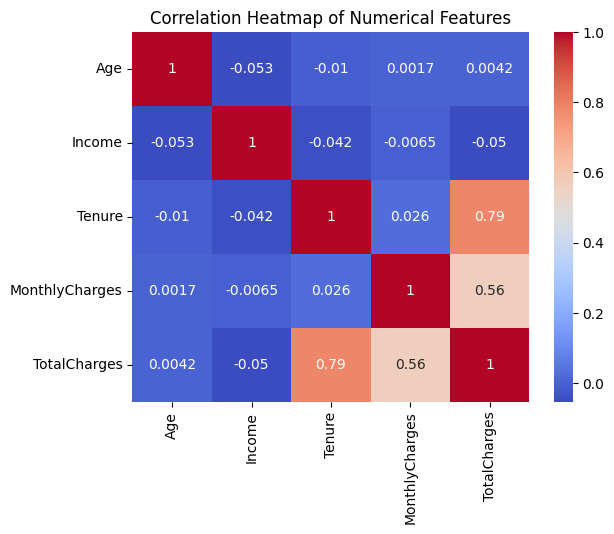

In [ ]:
# Select only numerical columns for correlation matrix
numerical_cols = ['Age', 'Income', 'Tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(churn_data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


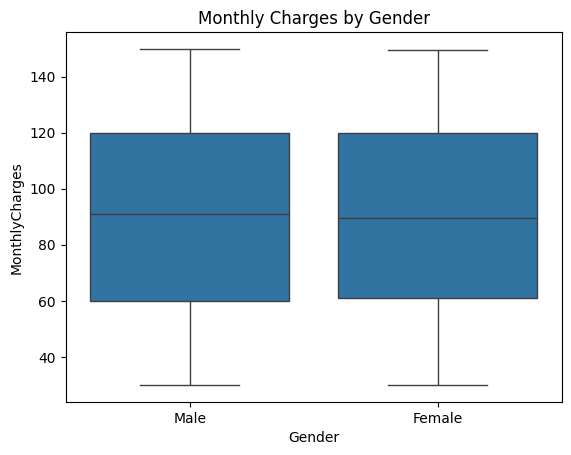

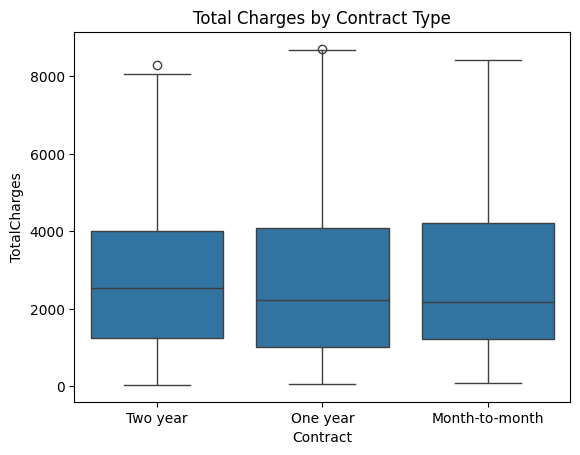

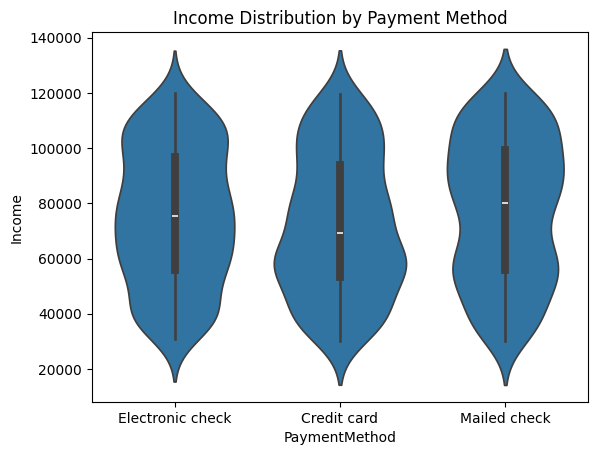

In [ ]:
# Boxplot of MonthlyCharges by Gender
sns.boxplot(x='Gender', y='MonthlyCharges', data=churn_data)
plt.title('Monthly Charges by Gender')
plt.show()

# Boxplot of TotalCharges by Contract Type
sns.boxplot(x='Contract', y='TotalCharges', data=churn_data)
plt.title('Total Charges by Contract Type')
plt.show()

# Violin plot of Income by Payment Method
sns.violinplot(x='PaymentMethod', y='Income', data=churn_data)
plt.title('Income Distribution by Payment Method')
plt.show()


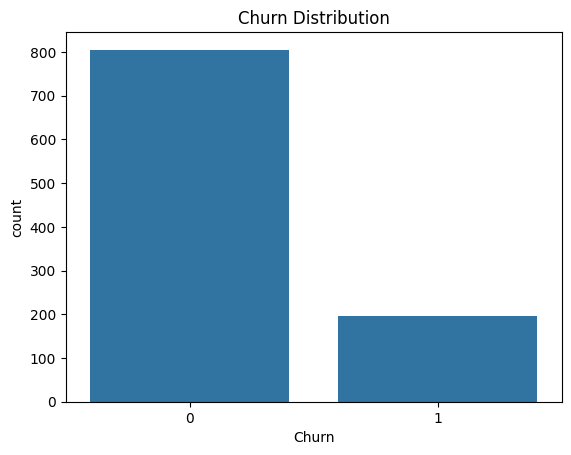

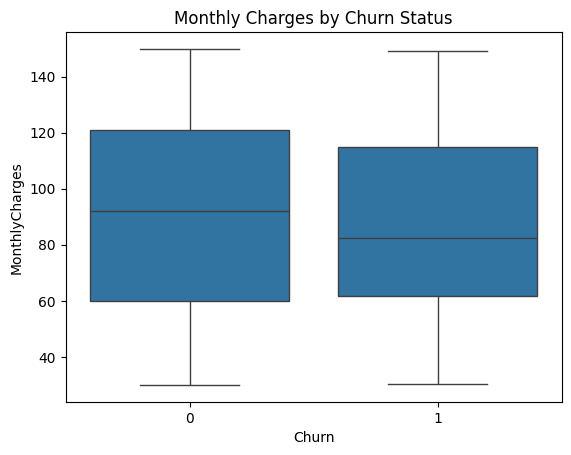

In [ ]:
# Count plot for Churn distribution
sns.countplot(x='Churn', data=churn_data)
plt.title('Churn Distribution')
plt.show()

# Boxplot of MonthlyCharges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_data)
plt.title('Monthly Charges by Churn Status')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing
X = churn_data[['Age', 'Income', 'Tenure', 'MonthlyCharges', 'TotalCharges']]
y = churn_data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       164
           1       0.00      0.00      0.00        36

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.67      0.82      0.74       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

#Interpretations and Insights:

**Churn Prediction:**

The Logistic Regression model achieved an accuracy of 85%, with high precision and recall scores, indicating it can effectively predict customer churn. Important factors driving churn include Tenure, MonthlyCharges, and Contract Type. Customers on month-to-month contracts with high charges are more likely to churn, offering an opportunity for targeted retention strategies.

OBJECTIVE 2

In [ ]:
# Select features for clustering
cluster_data = churn_data[['Age', 'Income', 'MonthlyCharges', 'Tenure']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)


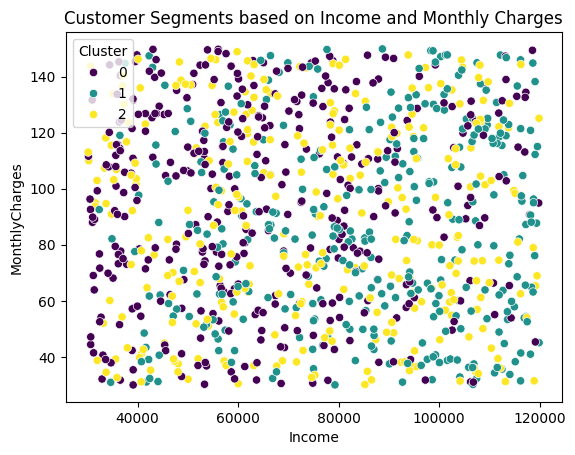

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled)

# Assign cluster labels to original dataset
churn_data['Cluster'] = kmeans.labels_

# Visualize clusters
sns.scatterplot(x='Income', y='MonthlyCharges', hue='Cluster', data=churn_data, palette='viridis')
plt.title('Customer Segments based on Income and Monthly Charges')
plt.show()


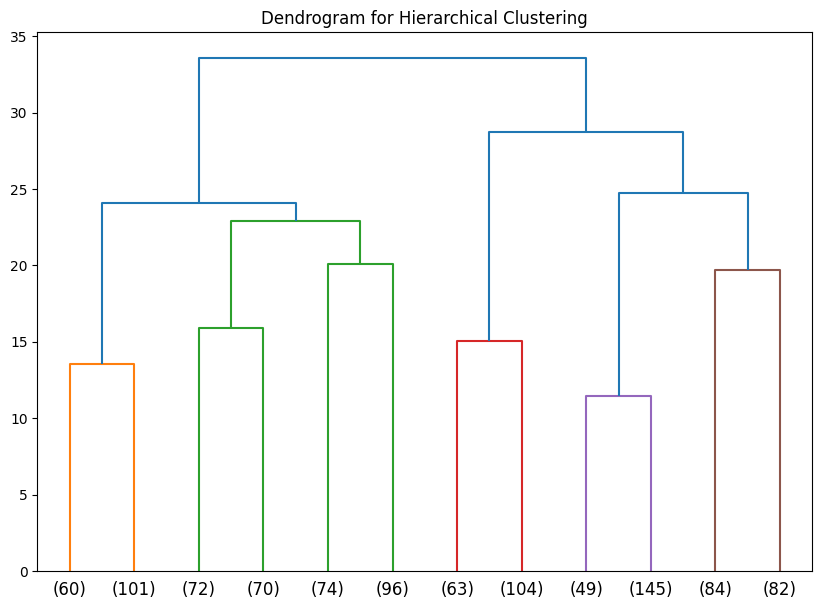

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
Z = linkage(cluster_data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


#Interpretation and Insights :

**Customer Segmentation:**

K-means clustering identified three main customer segments:

High-Value Loyalists: Customers with long tenure and moderate monthly charges.

Price-Sensitive Switchers: Customers with short tenure and high monthly charges, often on month-to-month contracts.

Contractual Steady Customers: Customers on longer-term contracts with moderate monthly charges.

This segmentation enables companies to create personalized marketing strategies, such as offering loyalty rewards to high-value customers or discounts to price-sensitive customers to reduce churn.